In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

from scipy import signal

In [2]:
DFs=pickle.load(open('DFs.pkl', 'rb'))
Summaries=pickle.load(open('Summaries.pkl', 'rb'))
print(len(DFs),len(Summaries))

357 357


In [3]:
myFormat = DateFormatter("%H:%M")
register_matplotlib_converters(myFormat)

In [4]:
%matplotlib inline

def plotHeartRate(df,summary):

    fig, axs0 = plt.subplots(nrows=1, ncols=1, figsize=(15, 2) )

    axs0.plot( df['BPM'])  # was df['dateTime']
    #axs0.set_xlabel('Time')
    axs0.set_ylabel('BPM')
    axs0.set_title( summary['string'] )
    axs0.grid(True)
    #axs0.xaxis.set_major_formatter(myFormat)
        
    fig.tight_layout()
    plt.show()

# end plotHeartRate

item: 36 topFrequncies: [0.00273 0.00182] theirPower: [32614. 96361.]


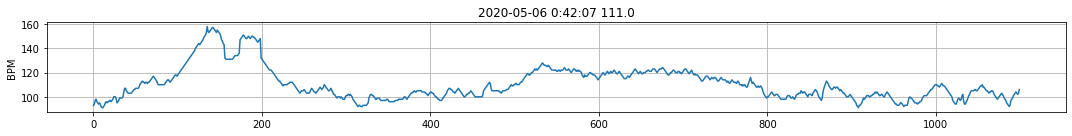

item: 37 topFrequncies: [0.00991 0.00062] theirPower: [32313. 48116.]


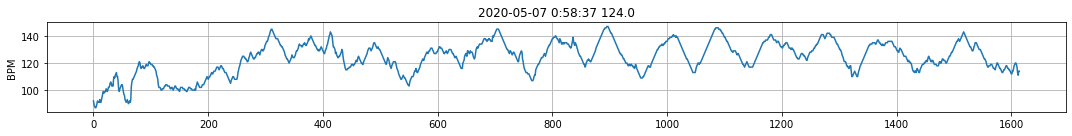

item: 68 topFrequncies: [0.00314 0.00157] theirPower: [44216. 88452.]


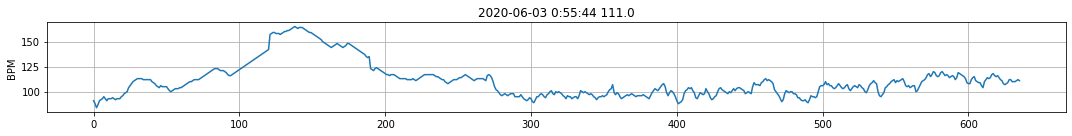

item: 84 topFrequncies: [0.00079 0.00394] theirPower: [26180. 34986.]


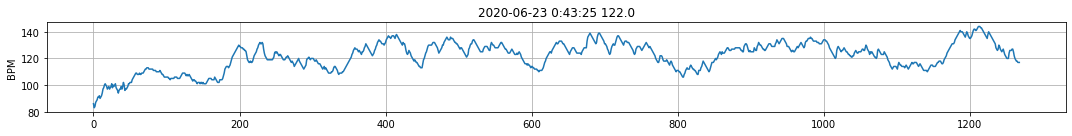

item: 86 topFrequncies: [0.00127 0.00063] theirPower: [36445. 44764.]


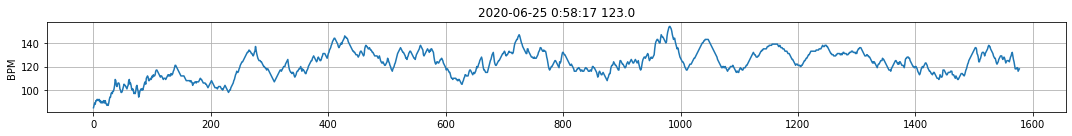

item: 92 topFrequncies: [0.00812 0.00058] theirPower: [13808. 17229.]


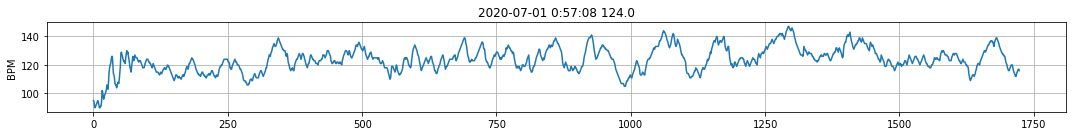

item: 105 topFrequncies: [0.00348 0.00232] theirPower: [16844. 54351.]


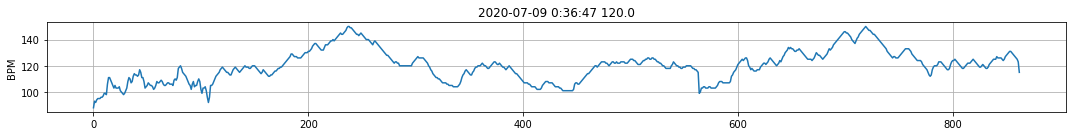

item: 116 topFrequncies: [0.01114 0.00066] theirPower: [20509. 77383.]


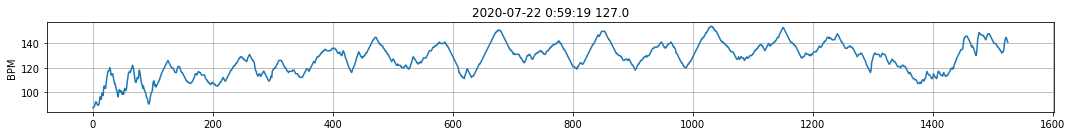

item: 136 topFrequncies: [0.00141 0.00071] theirPower: [26257. 39119.]


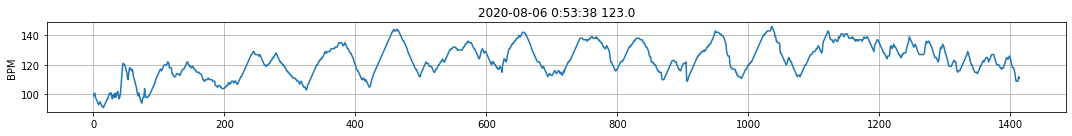

item: 150 topFrequncies: [0.004 0.003] theirPower: [21061. 24226.]


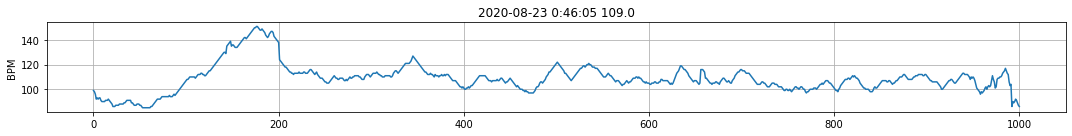

item: 170 topFrequncies: [0.00606 0.00067] theirPower: [34098. 95352.]


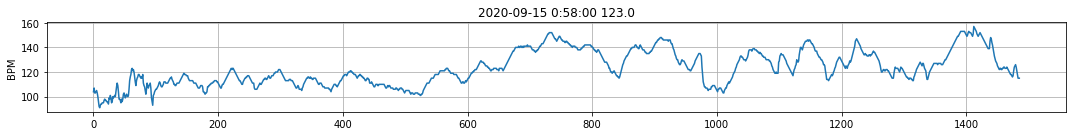

item: 181 topFrequncies: [0.00771 0.00514] theirPower: [36164. 45352.]


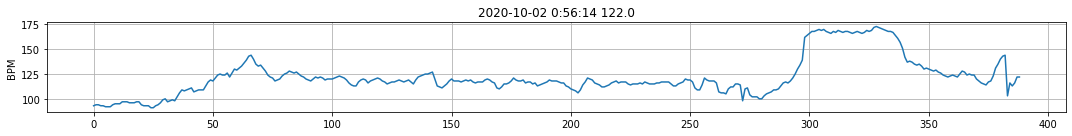

item: 183 topFrequncies: [0.00312 0.00623] theirPower: [31250. 38776.]


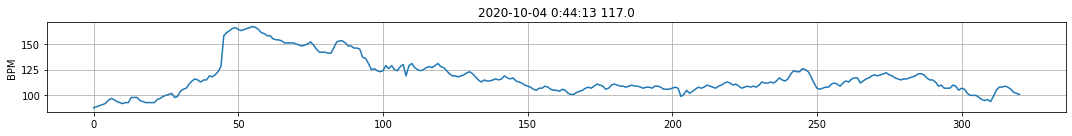

item: 185 topFrequncies: [0.00806 0.00403] theirPower: [33083. 94915.]


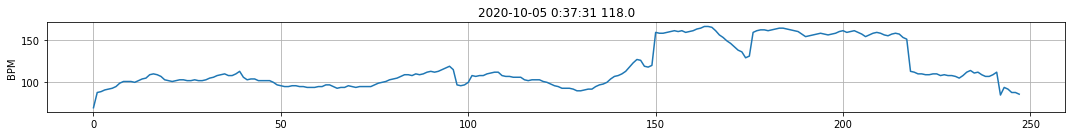

item: 186 topFrequncies: [0.0051  0.00255] theirPower: [38976. 53160.]


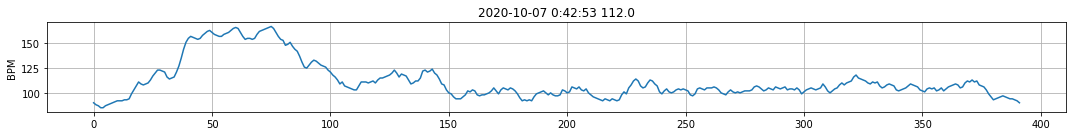

item: 188 topFrequncies: [0.00247 0.00494] theirPower: [44265. 87212.]


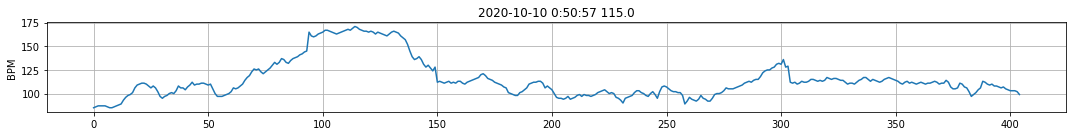

item: 191 topFrequncies: [0.00906 0.00604] theirPower: [19464. 92669.]


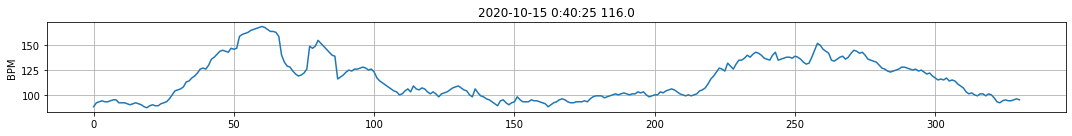

item: 223 topFrequncies: [0.0044  0.00147] theirPower: [ 6694. 13035.]


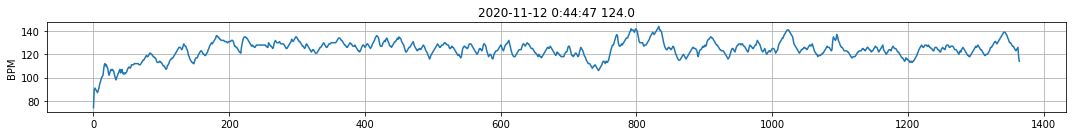

item: 229 topFrequncies: [0.00113 0.00056] theirPower: [18985. 35717.]


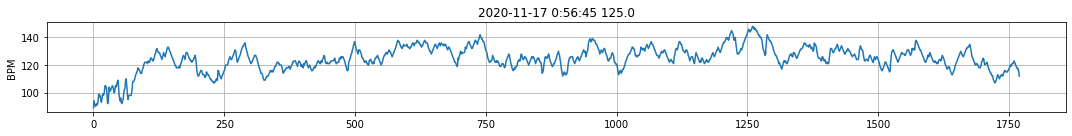

item: 235 topFrequncies: [0.00062 0.00123] theirPower: [41348. 69702.]


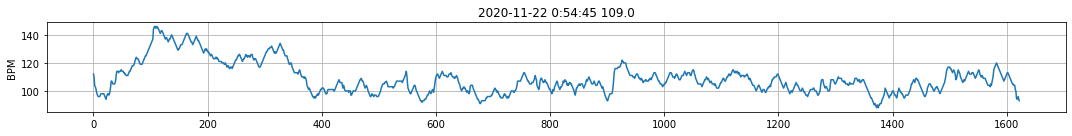

item: 242 topFrequncies: [0.00081 0.00403] theirPower: [46814. 54033.]


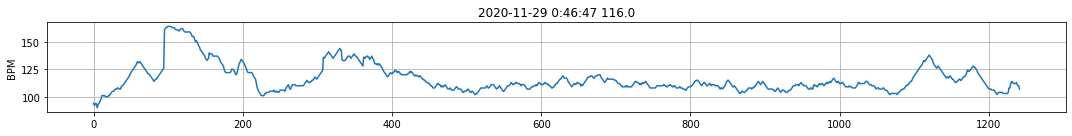

item: 250 topFrequncies: [0.00217 0.00072] theirPower: [51339. 82604.]


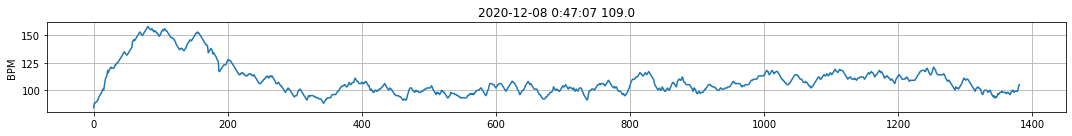

item: 261 topFrequncies: [0.00532 0.01064] theirPower: [ 11505. 123129.]


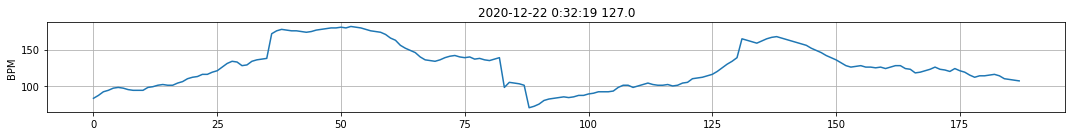

item: 263 topFrequncies: [0.0061  0.00305] theirPower: [46022. 68420.]


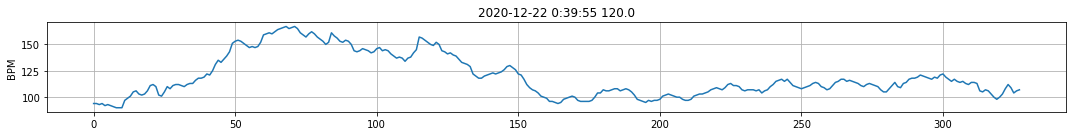

item: 267 topFrequncies: [0.00155 0.00232] theirPower: [27382. 29887.]


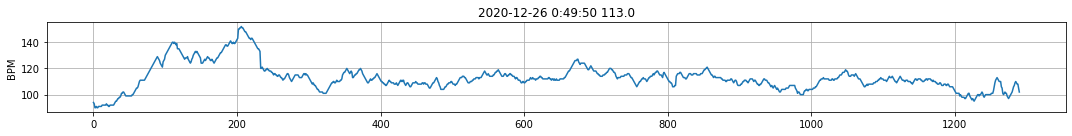

item: 281 topFrequncies: [0.00142 0.00212] theirPower: [80715. 85522.]


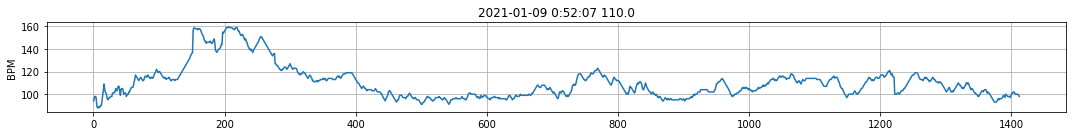

item: 283 topFrequncies: [0.00719 0.00216] theirPower: [15551. 46687.]


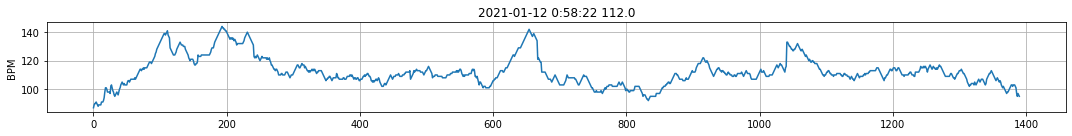

item: 284 topFrequncies: [0.00209 0.00105] theirPower: [40325. 48320.]


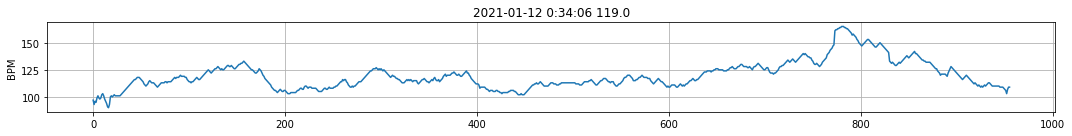

item: 288 topFrequncies: [0.002   0.00266] theirPower: [30793. 31278.]


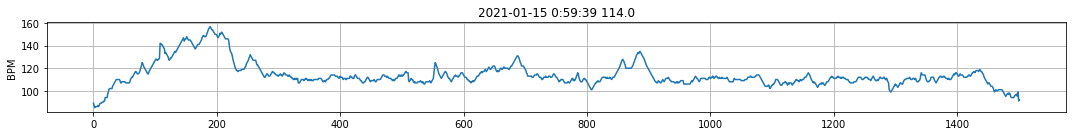

item: 289 topFrequncies: [0.00068 0.00135] theirPower: [23764. 94221.]


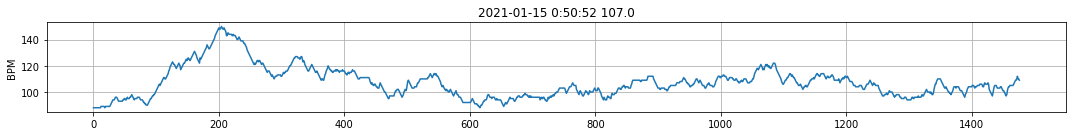

item: 310 topFrequncies: [0.00088 0.00176] theirPower: [85994. 87504.]


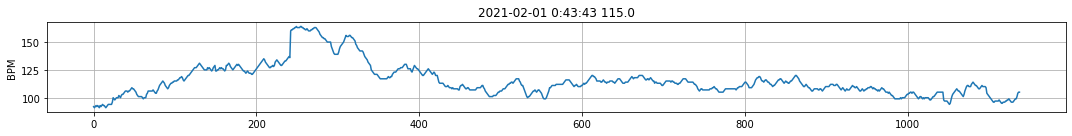

item: 316 topFrequncies: [0.0026  0.00173] theirPower: [100599. 107834.]


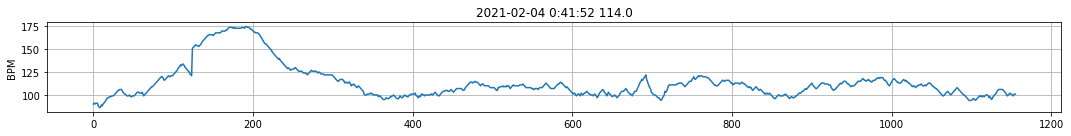

item: 318 topFrequncies: [0.00387 0.00129] theirPower: [24818. 61694.]


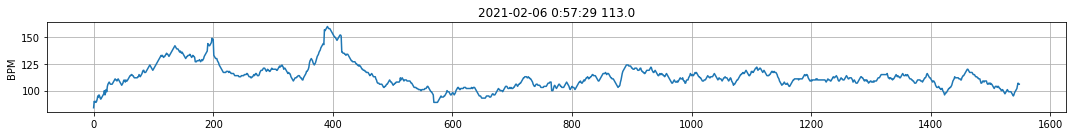

item: 326 topFrequncies: [0.0031  0.00155] theirPower: [60205. 96826.]


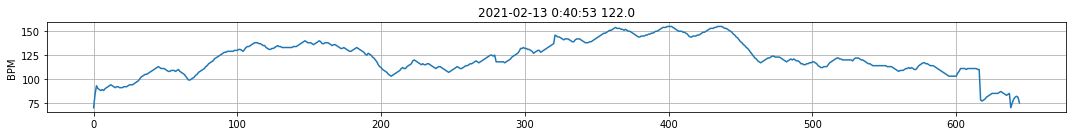

item: 327 topFrequncies: [0.0014 0.0007] theirPower: [ 39430. 261481.]


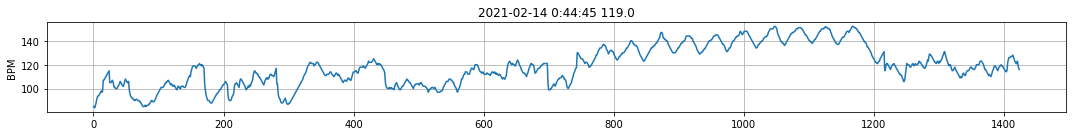

item: 328 topFrequncies: [0.00065 0.00195] theirPower: [69653. 79880.]


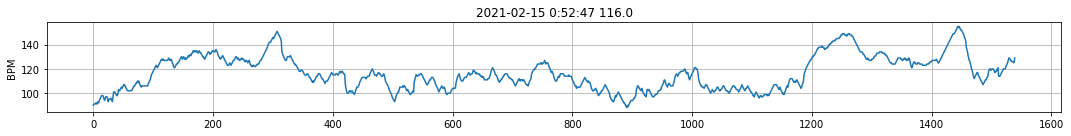

item: 330 topFrequncies: [0.00383 0.00128] theirPower: [16497. 68647.]


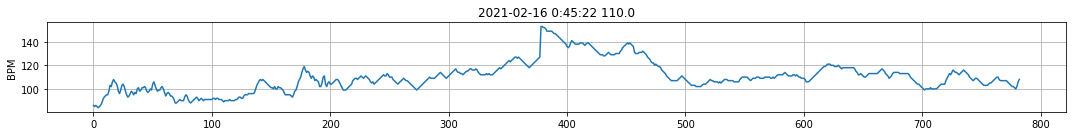

item: 331 topFrequncies: [0.00152 0.00076] theirPower: [ 82952. 164021.]


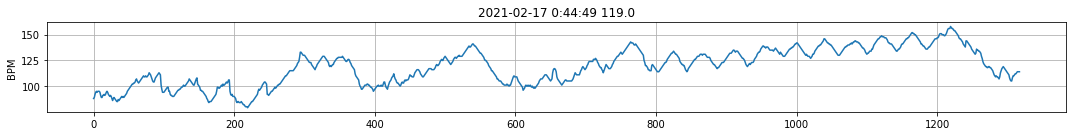

item: 333 topFrequncies: [0.001   0.00402] theirPower: [26016. 37145.]


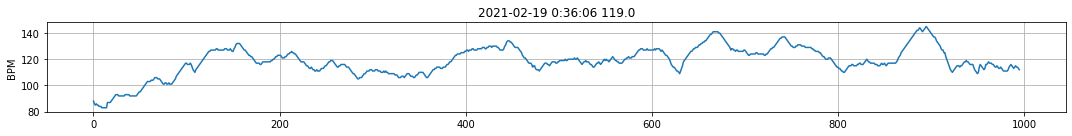

item: 334 topFrequncies: [0.00098 0.00197] theirPower: [63727. 64462.]


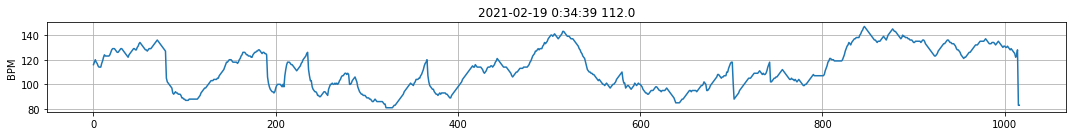

item: 337 topFrequncies: [0.00075 0.00149] theirPower: [ 76559. 105302.]


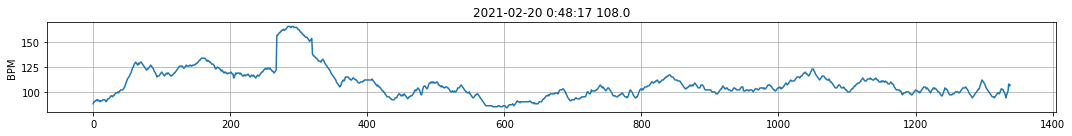

item: 350 topFrequncies: [0.00125 0.00062] theirPower: [ 71813. 148226.]


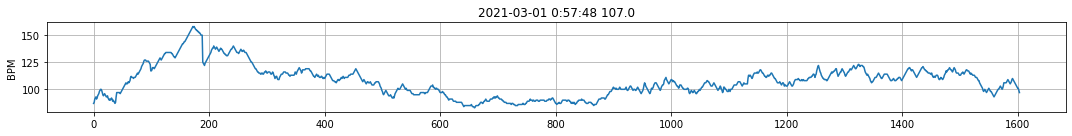

In [13]:
nFrequencies=2

i=-1
for (df,summary) in zip(DFs,Summaries):
    i+=1
    # I am interested in cycling sprints; I know that these were activities which took between
    # 20 and 60 minutes and included much peakZone heart rates; so anything else is skipped
    if  summary['duration']<pd.Timedelta("20 minutes") \
        or summary['duration']>pd.Timedelta("60 minutes") \
        or summary['peakZone']<50  :
        #print('Duration and peakZone',summary['duration'],summary['peakZone'])
        continue
        
    length=len(df)
    t = np.arange(start=0, stop=5*length, step=5)
    x = df['BPM'] 
    
    (frequncies,power)=signal.periodogram(x,fs=1,return_onesided=True)  
    # Frequncy in is mostly 1/(5 seconds), but some time points are skipped, so I assume fs=1
    # I am interested in the top frequencies in order to identify the cycling sprints
    topFrequencies=np.argpartition(power, -nFrequencies)[-nFrequencies:]
    print('item:',i,'topFrequncies:',frequncies[topFrequencies].round(5),'theirPower:',power[topFrequencies].round(0))
    plotHeartRate(df,summary)
    
# END for (df,s)  